In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import bz2
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.ft.txt.bz2', 'train.ft.txt.bz2']


In [ ]:
trainfile = bz2.BZ2File('../input/train.ft.txt.bz2','r')
lines = trainfile.readlines()

In [ ]:
lines[1]

In [ ]:
docSentimentList=[]
def getDocumentSentimentList(docs,splitStr='__label__'):
    for i in range(len(docs)):
        #print('Processing doc ',i,' of ',len(docs))
        text=str(lines[i])
        #print(text)
        splitText=text.split(splitStr)
        secHalf=splitText[1]
        text=secHalf[2:len(secHalf)-1]
        sentiment=secHalf[0]
        #print('First half:',secHalf[0],'\nsecond half:',secHalf[2:len(secHalf)-1])
        docSentimentList.append([text,sentiment])
    print('Done!!')
    return docSentimentList

In [ ]:
docSentimentList=getDocumentSentimentList(lines[:1000000],splitStr='__label__')

In [ ]:
train_df = pd.DataFrame(docSentimentList,columns=['Text','Sentiment'])
train_df.head()

In [ ]:
train_df['Sentiment'][train_df['Sentiment']=='1'] = 0
train_df['Sentiment'][train_df['Sentiment']=='2'] = 1

In [ ]:
train_df['Sentiment'].value_counts()

In [ ]:
train_df['word_count'] = train_df['Text'].str.lower().str.split().apply(len)
train_df.head()

In [ ]:
import string 
def remove_punc(s):
    table = str.maketrans({key: None for key in string.punctuation})
    return s.translate(table)

In [ ]:
train_df['Text'] = train_df['Text'].apply(remove_punc)
train_df.shape

In [ ]:
train_df.head()

In [ ]:
len(train_df['word_count'][train_df['word_count']<=25])

In [ ]:
train_df1 = train_df[:][train_df['word_count']<=25]
train_df1.head()

In [ ]:
train_df1['Sentiment'].value_counts()

In [ ]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
st_wd = text.ENGLISH_STOP_WORDS
c_vector = CountVectorizer(stop_words = st_wd,min_df=.0001,lowercase=1)
X_counts = c_vector.fit_transform(train_df1['Text'].values)

In [ ]:
X_counts

In [ ]:
from sklearn.model_selection import train_test_split
y = train_df1['Sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.1, random_state=42)

In [ ]:
X_train = X_train.todense()
X_test = X_test.todense()

In [ ]:
X_train.shape

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

model1=  Sequential()
model1.add(Dense(1000,input_shape=(8915,),activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist = model1.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1)

In [ ]:
model1.evaluate(X_test, y_test, batch_size=128)

In [ ]:
model1.evaluate(X_train, y_train, batch_size=128)

In [24]:
model2=  Sequential()
model2.add(Dense(1000,input_shape=(8915,),activation='relu'))
model2.add(Dense(500,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist2 = model2.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1)


57348/57348 [==============================] - 7s 117us/step - loss: 0.2778 - acc: 0.8812
Epoch 2/6
57348/57348 [==============================] - 7s 121us/step - loss: 0.1540 - acc: 0.9418
Epoch 3/6
57348/57348 [==============================] - 6s 102us/step - loss: 0.0485 - acc: 0.9843
Epoch 4/6
57348/57348 [==============================] - 6s 111us/step - loss: 0.0076 - acc: 0.9978
Epoch 5/6
57348/57348 [==============================] - 6s 101us/step - loss: 0.0014 - acc: 0.9997
Epoch 6/6
57348/57348 [==============================] - 6s 105us/step - loss: 9.3470e-04 - acc: 0.9998


In [25]:
model3=  Sequential()
model3.add(Dense(2000,input_shape=(8915,),activation='relu'))
model3.add(Dense(1000,activation='relu'))
model3.add(Dense(500,activation='relu'))
model3.add(Dense(1,activation='sigmoid'))

model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist3 = model3.fit(X_train,y_train,epochs=6,batch_size=128,verbose=1)


Epoch 1/6
57348/57348 [==============================] - 9s 148us/step - loss: 0.2798 - acc: 0.8813
Epoch 2/6
57348/57348 [==============================] - 6s 110us/step - loss: 0.1477 - acc: 0.9442
Epoch 3/6
57348/57348 [==============================] - 7s 114us/step - loss: 0.0372 - acc: 0.9880
Epoch 4/6
57348/57348 [==============================] - 6s 110us/step - loss: 0.0075 - acc: 0.9978
Epoch 5/6
57348/57348 [==============================] - 7s 120us/step - loss: 0.0020 - acc: 0.9994
Epoch 6/6
57348/57348 [==============================] - 7s 121us/step - loss: 0.0015 - acc: 0.9995


In [26]:
model2.evaluate(X_test, y_test, batch_size=128)

6372/6372 [==============================] - 0s 57us/step


[0.817294172666691, 0.8913998742636389]

In [27]:
model3.evaluate(X_test, y_test, batch_size=128)

6372/6372 [==============================] - 0s 51us/step


[0.8666998289025062, 0.8917137474214515]

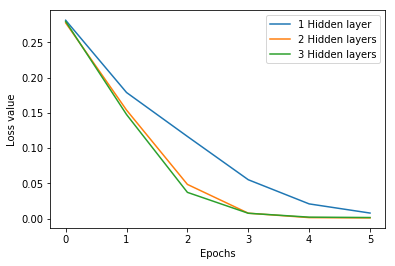

In [28]:
import matplotlib.pyplot as plt
loss_curve = hist.history['loss']
epoch_c = list(range(len(loss_curve)))
loss_curve2 = hist2.history['loss']
epoch_c = list(range(len(loss_curve)))
loss_curve3 = hist3.history['loss']
epoch_c = list(range(len(loss_curve)))
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.plot(epoch_c,loss_curve,label='1 Hidden layer')
plt.plot(epoch_c,loss_curve2,label='2 Hidden layers')
plt.plot(epoch_c,loss_curve3,label='3 Hidden layers')
plt.legend()
plt.show()

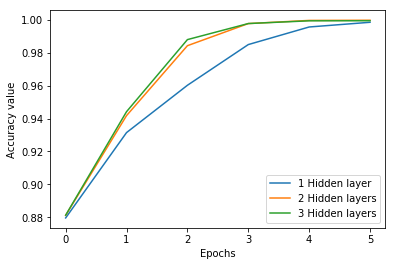

In [29]:
acc_curve = hist.history['acc']
epoch_c = list(range(len(loss_curve)))
acc_curve2 = hist2.history['acc']
epoch_c = list(range(len(loss_curve)))
acc_curve3 = hist3.history['acc']
epoch_c = list(range(len(loss_curve)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy value')
plt.plot(epoch_c,acc_curve,label='1 Hidden layer')
plt.plot(epoch_c,acc_curve2,label='2 Hidden layers')
plt.plot(epoch_c,acc_curve3,label='3 Hidden layers')
plt.legend()
plt.show()